In [1]:
pip install pandas numpy matplotlib yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade mplfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import mplfinance as mpf
import yfinance as yf
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [4]:
ticker = "DGE.L"

start_date = dt.strptime("2023-01-01", "%Y-%m-%d")
end_date = dt.strptime("2024-02-01", "%Y-%m-%d")
data = yf.download(ticker, start=start_date, end=end_date)

/home/success/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3656.0,3688.0,3608.000000,3612.5,3479.484863,5247816
2023-01-04,3634.0,3671.5,3624.771973,3658.5,3523.790771,3771144
2023-01-05,3668.5,3688.5,3635.000000,3652.5,3518.011963,3422369
2023-01-06,3625.5,3658.0,3577.271973,3646.5,3512.232666,2324302
2023-01-09,3655.5,3655.5,3587.500000,3635.0,3501.156250,4442836
...,...,...,...,...,...,...
2024-01-25,2702.5,2719.5,2700.000000,2710.0,2673.463623,2737368
2024-01-26,2796.0,2860.0,2792.000000,2849.0,2810.589600,4715618
2024-01-29,2820.0,2868.0,2815.500000,2841.5,2803.190918,5095664


In [6]:
x = data["Close"]/ data["Close"].shift() - 1
x

Date
2023-01-03         NaN
2023-01-04    0.012734
2023-01-05   -0.001640
2023-01-06   -0.001643
2023-01-09   -0.003154
                ...   
2024-01-25    0.003890
2024-01-26    0.051292
2024-01-29   -0.002633
2024-01-30    0.006511
2024-01-31    0.000175
Name: Close, Length: 272, dtype: float64

In [7]:
x.rolling(20).mean()

Date
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06         NaN
2023-01-09         NaN
                ...   
2024-01-25   -0.002335
2024-01-26    0.000018
2024-01-29   -0.000026
2024-01-30    0.000168
2024-01-31    0.000816
Name: Close, Length: 272, dtype: float64

In [8]:
window_size = 20
data["mean"] = data["Close"].rolling(window_size).mean()
data["std"] = data["Close"].rolling(window_size).std()

In [9]:
#display data["mean"] if na do .dropna()

In [10]:
data["mean"]

Date
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06         NaN
2023-01-09         NaN
                ...   
2024-01-25    2778.950
2024-01-26    2778.725
2024-01-29    2778.375
2024-01-30    2778.575
2024-01-31    2780.625
Name: mean, Length: 272, dtype: float64


Create a signal


In [11]:
k = 1

data["signal"] = 0
#the price crosses the upper band, this is a sell signal
data.loc[data["Close"] > data["mean"] + k * data["std"], "signal"] = -1

#the price crosses the lower band, this is a buy signal
data.loc[data["Close"] < data["mean"] - k * data["mean"], "signal"] = 1 

##Backtesting

In [12]:
initial_capital = 10000
allocation = 0.1

In [13]:
data["position"] = allocation * data["signal"]
data["returns"] = data["position"].shift() * data["Close"].pct_change()

In [14]:
data[["position", "signal"]].head(50)

,position,signal
Date,,
2023-01-03,0.0,0
2023-01-04,0.0,0
2023-01-05,0.0,0
2023-01-06,0.0,0
2023-01-09,0.0,0
2023-01-10,0.0,0
2023-01-11,0.0,0
2023-01-12,0.0,0
2023-01-13,0.0,0


In [15]:
data["returns"].tail(50)

Date
2023-11-17    0.000000
2023-11-20   -0.000000
2023-11-21   -0.000000
2023-11-22    0.000000
2023-11-23   -0.000000
2023-11-24   -0.000000
2023-11-27   -0.000000
2023-11-28   -0.000000
2023-11-29   -0.000000
2023-11-30    0.000000
2023-12-01    0.000000
2023-12-04   -0.000000
2023-12-05    0.000000
2023-12-06   -0.000000
2023-12-07   -0.000000
2023-12-08    0.000000
2023-12-11   -0.000000
2023-12-12    0.000000
2023-12-13    0.000000
2023-12-14    0.000000
2023-12-15    0.001237
2023-12-18    0.000000
2023-12-19    0.000316
2023-12-20    0.000000
2023-12-21    0.000280
2023-12-22    0.000263
2023-12-27    0.000000
2023-12-28    0.000175
2023-12-29    0.000000
2024-01-02    0.001278
2024-01-03   -0.000000
2024-01-04    0.000000
2024-01-05   -0.000000
2024-01-08    0.000000
2024-01-09   -0.000000
2024-01-10    0.000000
2024-01-11    0.000000
2024-01-12   -0.000000
2024-01-15   -0.000000
2024-01-16   -0.000000
2024-01-17   -0.000000
2024-01-18   -0.000000
2024-01-19   -0.000000
2024-0

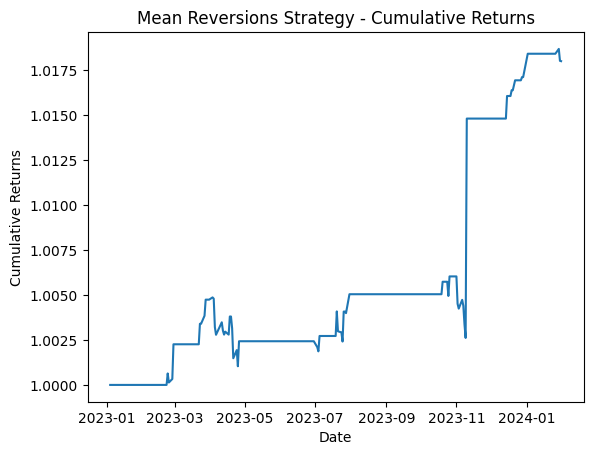

In [16]:
data["cum_returns"] = (1 + data["returns"]).cumprod()

plt.plot(data["cum_returns"])
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Mean Reversions Strategy - Cumulative Returns")
plt.show()


In [17]:
s = pd.Series([2,3,5])
s

0    2
1    3
2    5
dtype: int64

In [18]:
s.cumprod()

0     2
1     6
2    30
dtype: int64